In [1]:
import pandas as pd

raw_data = pd.read_excel("file:///C:/Users/dipam/Downloads/Psych_data_Jul2023.xlsx")

In [2]:
raw_data.head()

,Timestamp,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",...,Given below is a list of products. Please tell us how frequently do you use these products [Facewashes],Given below is a list of products. Please tell us how frequently do you use these products [Hair Conditioner],I generally read news from,I generally prefer to buy clothes from,Age,Gender,Occupation,Your hometown ?,Roll Number,Institute
0,2020-03-05 03:27:09.336,6,10,5,8,10,7,8,9,4,...,Everyday,Everyday,Online,Online,24-28,Male,Student,Other towns in South,Gokul Mohan S,Goa Institute Of Management
1,2020-03-05 03:27:30.640,4,8,5,5,5,5,7,8,2,...,Everyday,Everyday,Online,Retail Stores,24-28,Female,Student,Other towns in North,B2019111,GIM
2,2020-03-05 03:27:34.823,9,5,4,9,10,10,5,8,8,...,Everyday,Less Often,Online,Retail Stores,24-28,Male,Student,Other towns in West,B2019063,Goa Institute of Management
3,2020-03-05 03:27:43.949,9,9,6,7,7,3,4,8,8,...,Everyday,Less Often,Online,Online,18-23,Female,Student,Other towns in West,B2019104,Goa Institute of Management
4,2020-03-05 03:27:46.237,9,10,3,9,10,9,9,7,9,...,Everyday,Less Often,Online,Online,24-28,Male,Student,Kolkata,B2019066,GIM


In [3]:
data = raw_data.iloc[:,1:15]

In [4]:
data

,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",I prefer watching videos/shows online rather than watching them in the television,I prefer ordering in from online apps than dining out,"I follow Brands, celebrities, influencers on social media",I always try to keep up with new fashion trends,I prefer reading or listening to music rather than exercising or playing a sport
0,6,10,5,8,10,7,8,9,4,10,7,9,10,5
1,4,8,5,5,5,5,7,8,2,8,5,1,3,8
2,9,5,4,9,10,10,5,8,8,10,2,7,6,3
3,9,9,6,7,7,3,4,8,8,7,7,7,7,6
4,9,10,3,9,10,9,9,7,9,10,7,6,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,10,9,2,8,8,8,8,6,9,7,5,9,8,2
1248,6,9,9,3,9,9,5,8,9,8,9,9,5,4
1249,6,7,6,9,6,5,6,7,9,9,6,7,9,6
1250,2,10,6,7,9,9,8,1,4,6,6,2,4,6


In [5]:
data.isnull().sum()

I generally plan my expenses and never spend more than my budget                                  0
I often take opinions or check reviews before buying                                              0
I often experiment with new brands rather than just sticking to old ones                          0
I like to spend my weekends with friends than staying at home .                                   0
My favorite subjects in school were Mathematics & Science rather than Literature                  0
I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday    0
When I go out for shopping, I end up buying more items just by impulse                            0
I am active on almost all Social media                                                            0
I like light, sober colors to bright, exciting colors when it comes to clothing                   0
I prefer watching videos/shows online rather than watching them in the television                 0


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
silhoutte_avg = []

for i in range(2,11):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(data)
    # calculating silhoutte score
    silhoutte_avg.append(silhouette_score(data,kmean.labels_ ))


silhoutte_avg

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
D:\A

[0.13348167682022646,
 0.10843307281555746,
 0.07623420318576947,
 0.07502890070119884,
 0.07495450506151684,
 0.07334294040242031,
 0.07325031131019966,
 0.07145476698891466,
 0.07068569835249154]

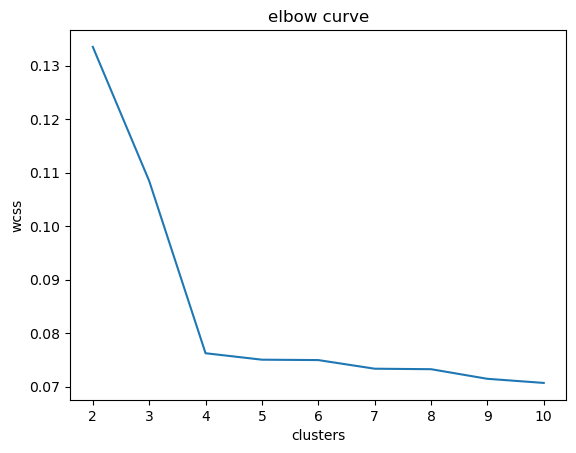

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), silhoutte_avg)
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.title('elbow curve')
plt.show()

In [9]:
# now fitting the data for 4 clusters
kmean=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmean.fit(data)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
pd.Series(kmean.labels_)

0       1
1       3
2       0
3       1
4       0
       ..
1247    0
1248    0
1249    1
1250    2
1251    2
Length: 1252, dtype: int32

In [11]:
raw_data['cluster_labels'] = pd.Series(kmean.labels_)

In [12]:
raw_data

,Timestamp,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",...,Given below is a list of products. Please tell us how frequently do you use these products [Hair Conditioner],I generally read news from,I generally prefer to buy clothes from,Age,Gender,Occupation,Your hometown ?,Roll Number,Institute,cluster_labels
0,2020-03-05 03:27:09.336,6,10,5,8,10,7,8,9,4,...,Everyday,Online,Online,24-28,Male,Student,Other towns in South,Gokul Mohan S,Goa Institute Of Management,1
1,2020-03-05 03:27:30.640,4,8,5,5,5,5,7,8,2,...,Everyday,Online,Retail Stores,24-28,Female,Student,Other towns in North,B2019111,GIM,3
2,2020-03-05 03:27:34.823,9,5,4,9,10,10,5,8,8,...,Less Often,Online,Retail Stores,24-28,Male,Student,Other towns in West,B2019063,Goa Institute of Management,0
3,2020-03-05 03:27:43.949,9,9,6,7,7,3,4,8,8,...,Less Often,Online,Online,18-23,Female,Student,Other towns in West,B2019104,Goa Institute of Management,1
4,2020-03-05 03:27:46.237,9,10,3,9,10,9,9,7,9,...,Less Often,Online,Online,24-28,Male,Student,Kolkata,B2019066,GIM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,2023-06-27 03:15:55.450,10,9,2,8,8,8,8,6,9,...,Less Often,Online,Retail Stores,29-33,Male,Student,Kolkata,C23001,Praxis Business School,0
1248,2023-06-27 03:15:58.882,6,9,9,3,9,9,5,8,9,...,Less Often,Online,Retail Stores,24-28,Male,Student,Kolkata,C23034,PRAXIS BUSINESS SCHOOL,0
1249,2023-06-27 03:16:09.509,6,7,6,9,6,5,6,7,9,...,Less Often,Newspaper,Retail Stores,24-28,Male,Working Executive,Kolkata,C23010,Praxis Business School,1
1250,2023-06-27 03:17:19.895,2,10,6,7,9,9,8,1,4,...,Less Often,Online,Online,24-28,Male,Student,Other towns in North,C23024,Praxis Business School,2


In [15]:
raw_data.columns

Index(['Timestamp',
       'I generally plan my expenses and never spend more than my budget ',
       'I often take opinions or check reviews before buying',
       'I often experiment with new brands rather than just sticking to old ones ',
       'I like to spend my weekends with friends than staying at home . ',
       'My favorite subjects in school were Mathematics & Science rather than Literature',
       'I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday',
       'When I go out for shopping, I end up buying more items just by impulse',
       'I am active on almost all Social media  ',
       'I like light, sober colors to bright, exciting colors when it comes to clothing ',
       'I prefer watching videos/shows online rather than watching them in the television',
       'I prefer ordering in from online apps than dining out',
       'I follow Brands, celebrities, influencers on social media',
       'I always try to keep up with ne

In [16]:
def percent(x):
    return round((x/1252)*100)

In [17]:
import pandas as pd
# Group the data by 'cluster_labels' and 'gender', then count the occurrences of each gender within each cluster.
gender_count_by_cluster = raw_data.groupby(['cluster_labels', 'Gender']).size().reset_index(name='Count')
gender_count_by_cluster['percent']=gender_count_by_cluster['Count'].apply(percent)

In [18]:
gender_count_by_cluster

,cluster_labels,Gender,Count,percent
0,0,Female,80,6
1,0,Male,287,23
2,1,Female,135,11
3,1,Male,217,17
4,2,Female,50,4
5,2,Male,184,15
6,3,Female,77,6
7,3,Male,222,18


In [ ]:
raw_data['Gender'].value_counts()

In [19]:
Age_count_by_cluster = raw_data.groupby(['cluster_labels',"Which company's mobile phone do you use ?"]).size().reset_index(name='Count')
Age_count_by_cluster['percent']=Age_count_by_cluster['Count'].apply(percent)

In [20]:
Age_count_by_cluster

,cluster_labels,Which company's mobile phone do you use ?,Count,percent
0,0,Apple,59,5
1,0,One Plus,82,7
2,0,Oppo,7,1
3,0,Others,51,4
4,0,Samsung,70,6
5,0,Vivo,13,1
6,0,Xiaomi,85,7
7,1,Apple,78,6
8,1,One Plus,79,6
9,1,Oppo,13,1


In [21]:
raw_data["Which company's mobile phone do you use ?"].value_counts()

Xiaomi      279
One Plus    262
Samsung     241
Others      197
Apple       196
Vivo         43
Oppo         34
Name: Which company's mobile phone do you use ?, dtype: int64

In [22]:
Hometown_by_cluster = raw_data.groupby(['cluster_labels',"Your hometown ?",]).size().reset_index(name='Count')
Hometown_by_cluster['percent']=Age_count_by_cluster['Count'].apply(percent)

In [23]:
raw_data["Which company's mobile phone do you use ?"].value_counts()

Xiaomi      279
One Plus    262
Samsung     241
Others      197
Apple       196
Vivo         43
Oppo         34
Name: Which company's mobile phone do you use ?, dtype: int64

In [24]:
Age_count_by_cluster = raw_data.groupby(['cluster_labels',"Occupation ",
]).size()
print(Age_count_by_cluster)


cluster_labels  Occupation            
0               Student                   348
                Working Executive          19
1               Student                   335
                Working Executive          17
2               Self Employed/business      1
                Student                   201
                Working Executive          32
3               Others                      2
                Student                   275
                Working Executive          22
dtype: int64


In [25]:
raw_data[raw_data['Roll Number ']=='C23010']

,Timestamp,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",...,Given below is a list of products. Please tell us how frequently do you use these products [Hair Conditioner],I generally read news from,I generally prefer to buy clothes from,Age,Gender,Occupation,Your hometown ?,Roll Number,Institute,cluster_labels
1249,2023-06-27 03:16:09.509,6,7,6,9,6,5,6,7,9,...,Less Often,Newspaper,Retail Stores,24-28,Male,Working Executive,Kolkata,C23010,Praxis Business School,1


In [26]:
raw_data[raw_data['Roll Number ']=='C23036']

,Timestamp,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",...,Given below is a list of products. Please tell us how frequently do you use these products [Hair Conditioner],I generally read news from,I generally prefer to buy clothes from,Age,Gender,Occupation,Your hometown ?,Roll Number,Institute,cluster_labels
1243,2023-06-27 03:14:21.575,10,10,6,6,10,5,2,9,10,...,Less Often,Online,Online,24-28,Male,Student,Kolkata,C23036,Praxis Business School,1


In [27]:
raw_data[raw_data['Roll Number ']=='C23005']

,Timestamp,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",...,Given below is a list of products. Please tell us how frequently do you use these products [Hair Conditioner],I generally read news from,I generally prefer to buy clothes from,Age,Gender,Occupation,Your hometown ?,Roll Number,Institute,cluster_labels
1251,2023-06-27 03:19:49.262,9,10,7,1,8,9,1,6,9,...,Less Often,Online,Retail Stores,29-33,Male,Student,Kolkata,C23005,Praxis,2
